In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
from pathlib import Path

# Add the src directory to the Python path
sys.path.append(str(Path.cwd().parent.parent / "src"))

from utils._eda import TimeSeriesEDA

In [3]:
# Load the dataset
file_path = "../../data/bronze/LD2011_2014.txt"
df = pd.read_csv(file_path, sep=";", index_col=0, parse_dates=True, decimal=",")

In [4]:
# Check the first few rows
display(df.head())

# Get dataset info
print(df.info())

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB
None


In [5]:
# Print only columns with missing values
missing_columns = df.columns[df.isnull().any()]
print("Columns with missing values:", missing_columns.tolist())

Columns with missing values: []


In [6]:
# Summary statistics
print(df.describe())


              MT_001         MT_002         MT_003         MT_004  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean        3.970785      20.768480       2.918308      82.184490   
std         5.983965      13.272415      11.014456      58.248392   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       2.844950       0.000000      36.585366   
50%         1.269036      24.893314       1.737619      87.398374   
75%         2.538071      29.871977       1.737619     115.853659   
max        48.223350     115.220484     151.172893     321.138211   

              MT_005         MT_006         MT_007         MT_008  \
count  140256.000000  140256.000000  140256.000000  140256.000000   
mean       37.240309     141.227385       4.521338     191.401476   
std        26.461327      98.439984       6.485684     121.981187   
min         0.000000       0.000000       0.000000       0.000000   
25%        15.853659      71.4285

In [7]:
# Convert column names to numeric (Client IDs)
df.columns = [f"Client_{i+1}" for i in range(df.shape[1])]

# Resample to hourly data
df_hourly = df.resample("h").sum()

# Resample to daily data
df_daily = df.resample("D").sum()

# Add day of the week and hour columns
df["day_of_week"] = df.index.dayofweek  # Monday=0, Sunday=6
df["hour"] = df.index.hour

# Mark weekends
df["is_weekend"] = df["day_of_week"].apply(lambda x: 1 if x in [5, 6] else 0)

### Plot Clients Load over Time

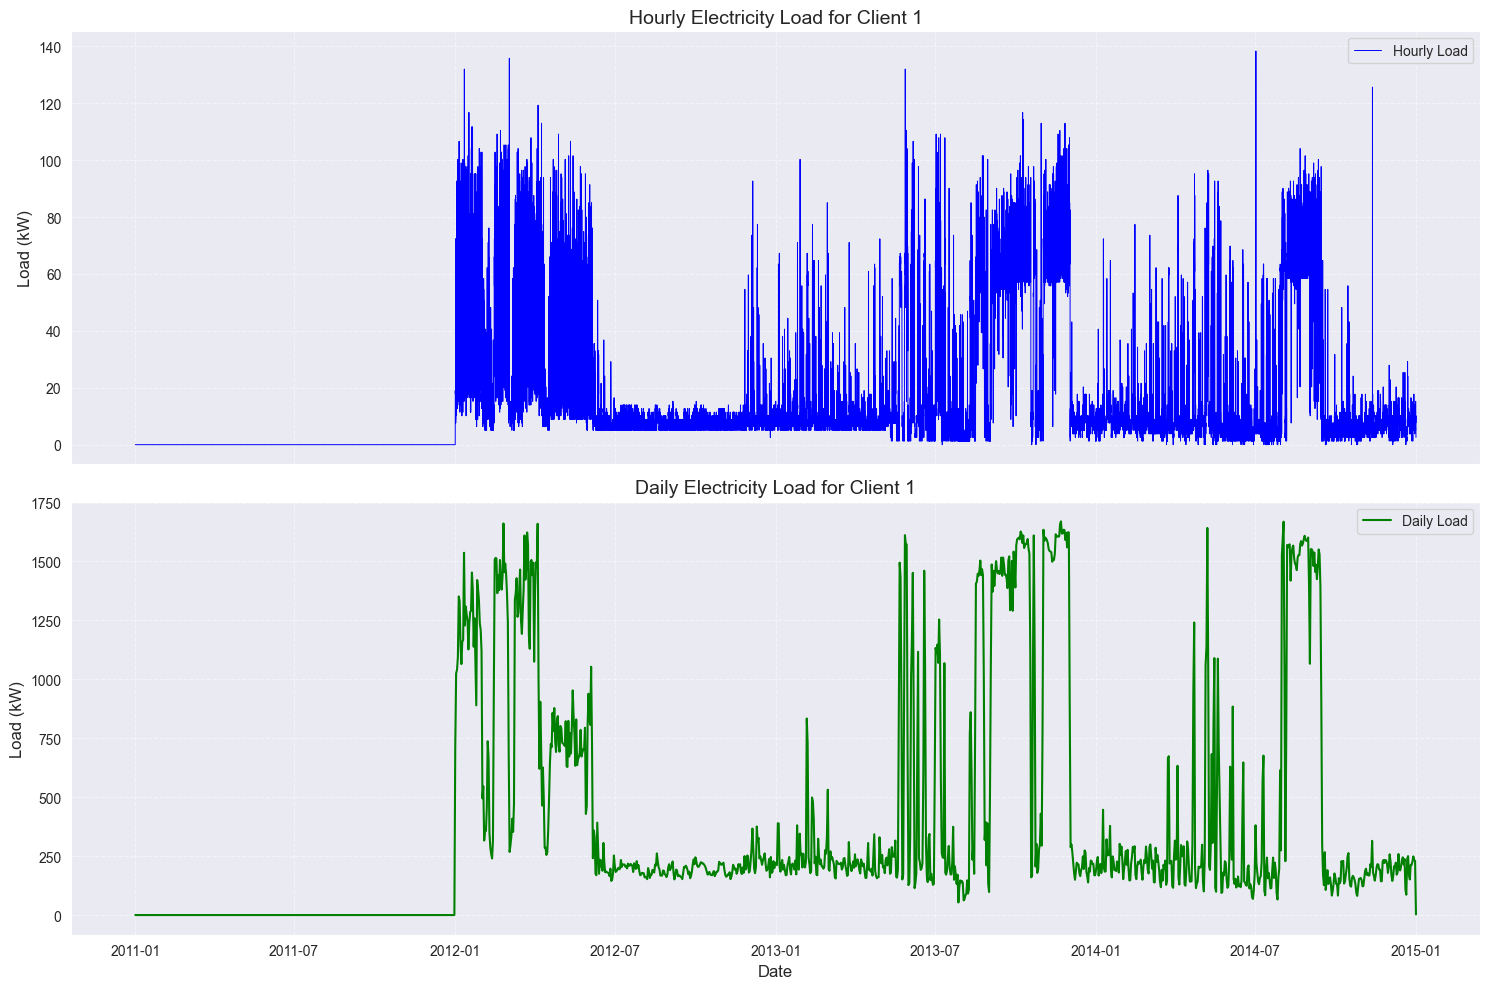

In [8]:
# Plot hourly and daily electricity consumption for a sample client
fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Hourly data
axes[0].plot(df_hourly.index, df_hourly["Client_1"], label="Hourly Load", color="blue", linewidth=0.7)
axes[0].set_title("Hourly Electricity Load for Client 1", fontsize=14)
axes[0].set_ylabel("Load (kW)", fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.5)

# Daily data
axes[1].plot(df_daily.index, df_daily["Client_1"], label="Daily Load", color="green", linewidth=1.5)
axes[1].set_title("Daily Electricity Load for Client 1", fontsize=14)
axes[1].set_xlabel("Date", fontsize=12)
axes[1].set_ylabel("Load (kW)", fontsize=12)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


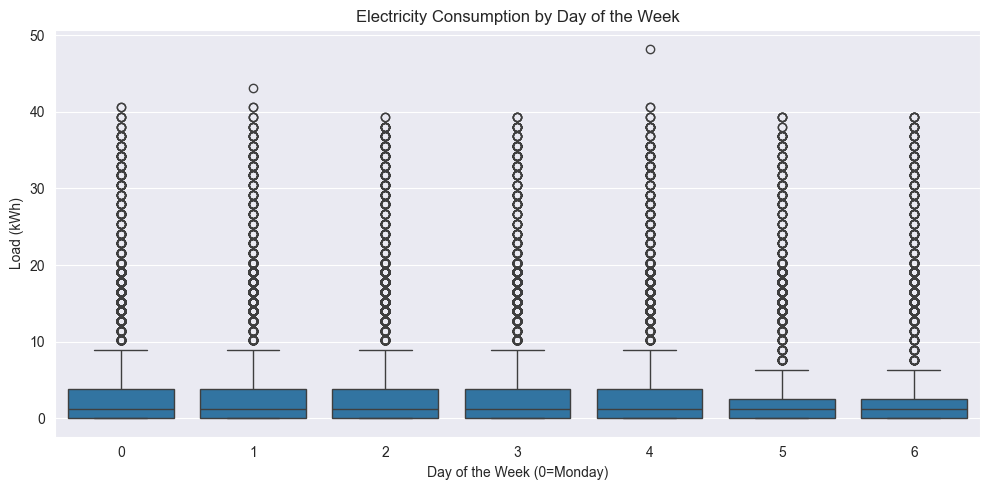

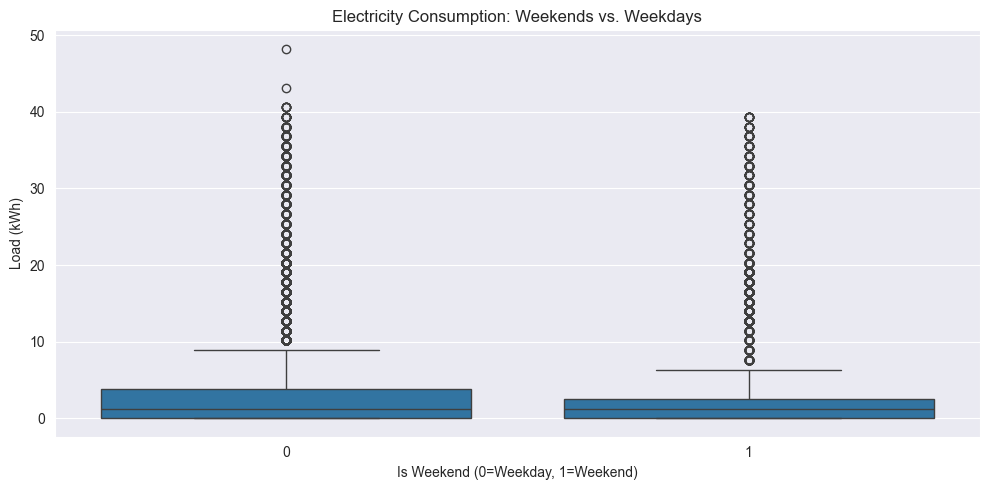

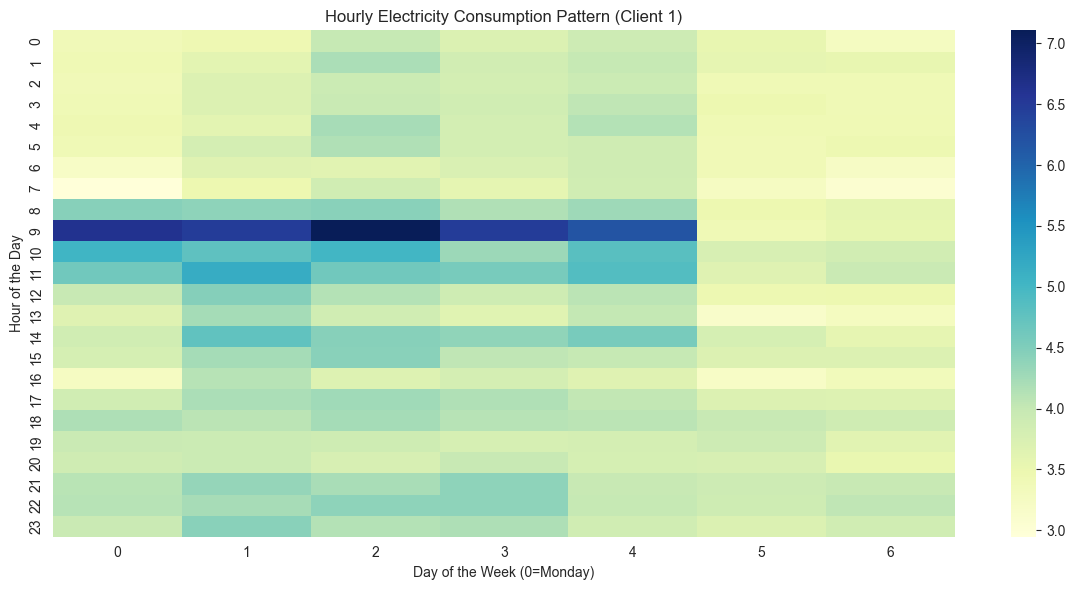

In [9]:
# Average load by day of the week
plt.figure(figsize=(10, 5))
sns.boxplot(x="day_of_week", y="Client_1", data=df)
plt.title("Electricity Consumption by Day of the Week")
plt.xlabel("Day of the Week (0=Monday)")
plt.ylabel("Load (kWh)")
plt.tight_layout()
plt.show()

# Average load for weekends vs. weekdays
plt.figure(figsize=(10, 5))
sns.boxplot(x="is_weekend", y="Client_1", data=df)
plt.title("Electricity Consumption: Weekends vs. Weekdays")
plt.xlabel("Is Weekend (0=Weekday, 1=Weekend)")
plt.ylabel("Load (kWh)")
plt.tight_layout()
plt.show()

# Heatmap of hourly consumption patterns
hourly_avg = df.groupby(["hour", "day_of_week"])["Client_1"].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(hourly_avg, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Hourly Electricity Consumption Pattern (Client 1)")
plt.xlabel("Day of the Week (0=Monday)")
plt.ylabel("Hour of the Day")
plt.tight_layout()
plt.show()

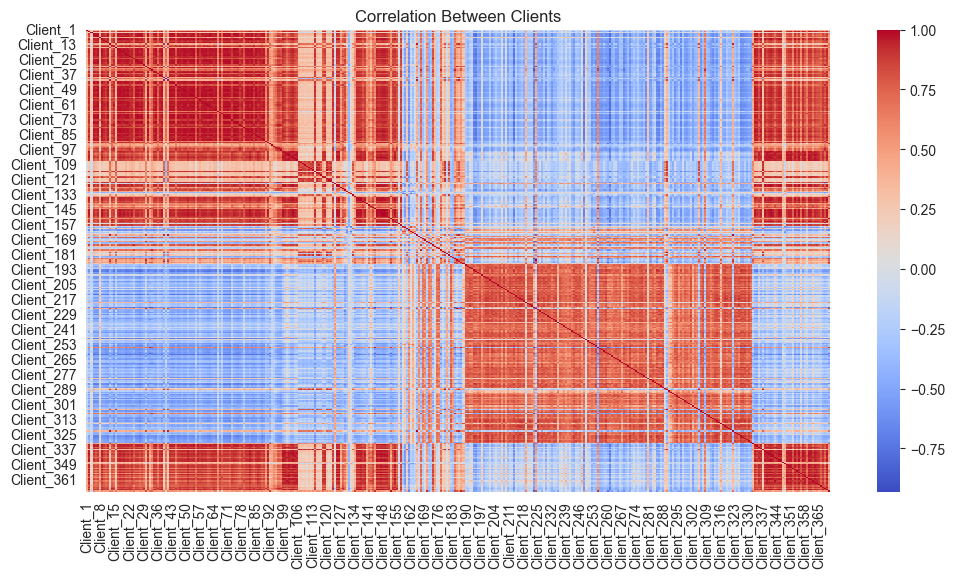

In [10]:
# Compute correlation matrix
corr_matrix = df_daily.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Between Clients")
plt.show()


### Summary Statistics ###
{'mean': np.float64(380.9346073454763), 'variance': np.float64(239625.1940087596), 'min': np.float64(0.0), 'max': np.float64(1670.0507614213197), 'missing_values': np.int64(0), 'periodicity': 292}

### Stationarity Test (ADF) ###
{'ADF Statistic': np.float64(-3.9795830353826367), 'p-value': np.float64(0.0015212757927466575), 'Lags Used': 16, 'Critical Values': {'1%': np.float64(-3.4348835326305642), '5%': np.float64(-2.863542248636555), '10%': np.float64(-2.5678359819686065)}, 'Stationary': np.True_}

### Outliers Detected (Z-score Method) ###
(Series([], Freq: D, Name: Client_1, dtype: float64), 'zscore')

### Outliers Detected (Seasonal Method) ###
(2011-02-25       0.000000
2011-12-14       0.000000
2012-01-11    1536.802030
2012-01-20    1453.045685
2012-02-17    1512.690355
2012-02-21    1506.345178
2012-02-25    1661.167513
2012-02-27    1491.116751
2012-10-01     244.923858
2013-05-28    1611.675127
2013-05-29    1572.335025
2013-05-30    1572.335025
2

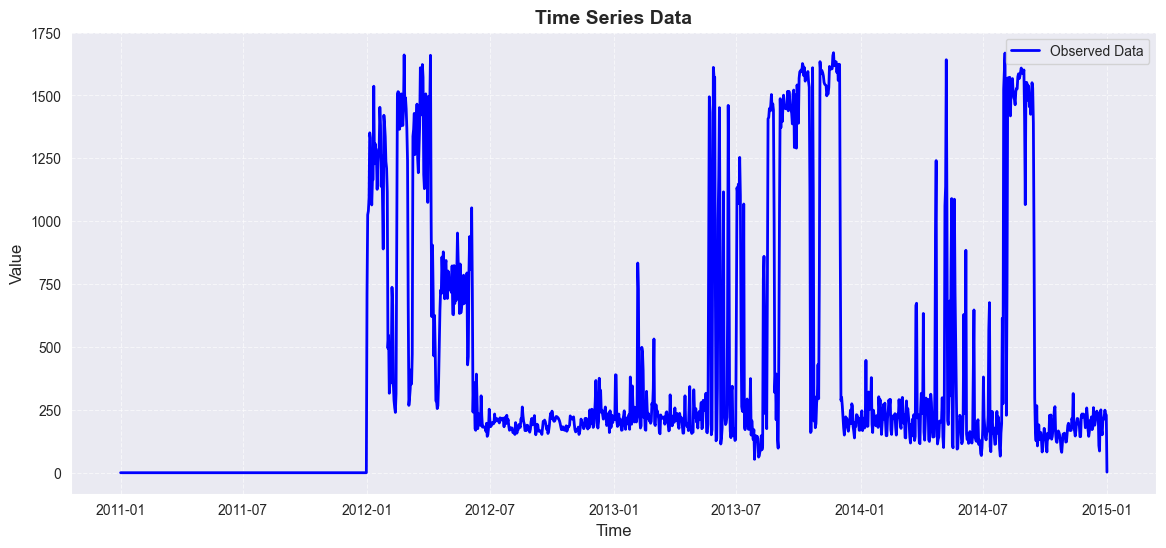

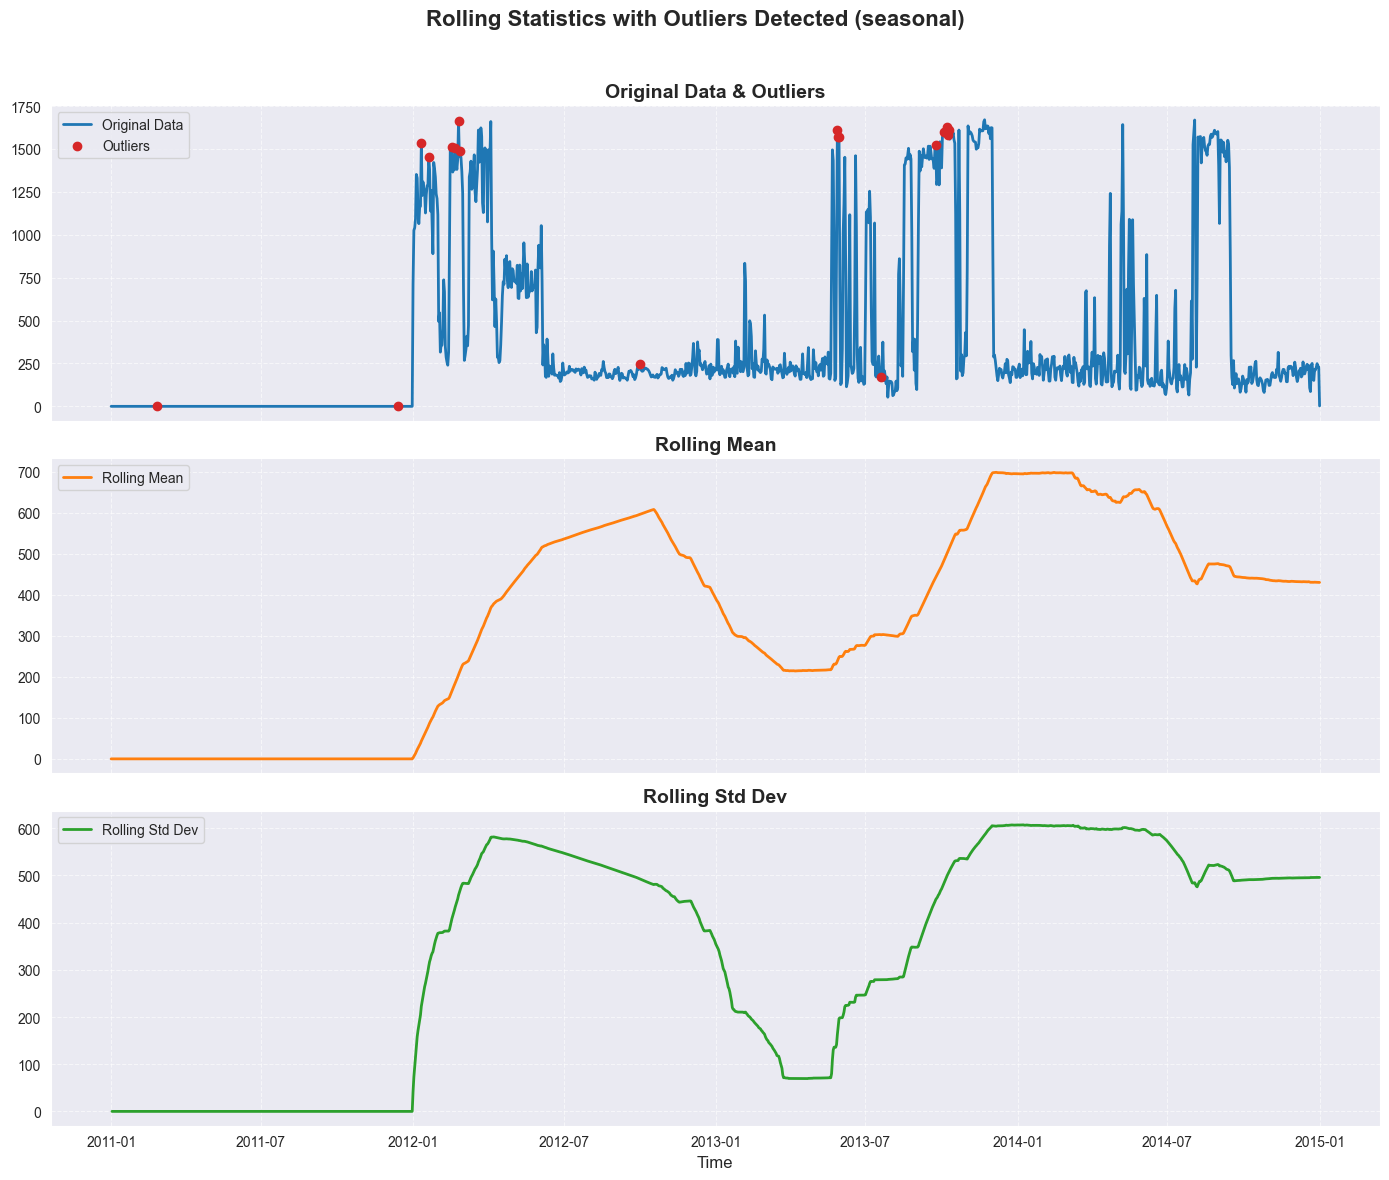

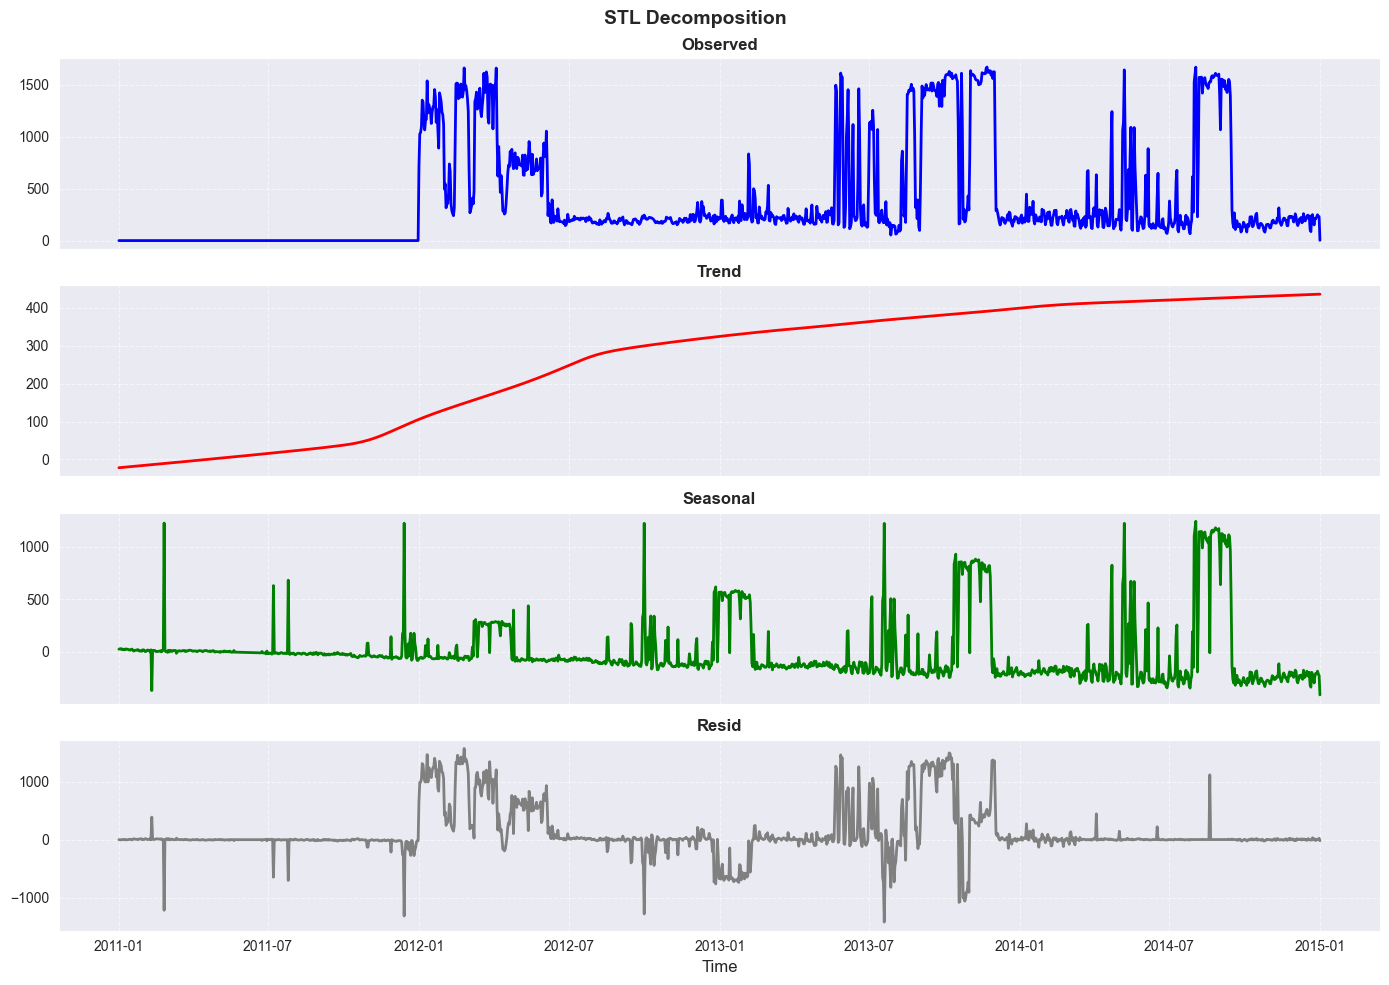

In [11]:
# Select a sample client for analysis
client_ts = df_daily["Client_1"].dropna()

# Instantiate the EDA class
ts_eda = TimeSeriesEDA(client_ts)

# Run full analysis
ts_eda.run_full_analysis()